# Michał Szczurek - lab 2. #

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Gnerowanie danych ###

In [2]:
def generate_data(N):
    A =  np.random.rand(N,N)
    inv_A = np.linalg.inv(A)
    # reshape twprzy wektory kolumnowe
    u = np.random.rand(N).reshape(-1,1)
    v = np.random.rand(N).reshape(-1,1) 
    AuvT = A + u @ v.T
    return A, u, v, inv_A, AuvT

In [3]:
N = 3
A, u, v, inv_A, AuvT = generate_data(N)

### Trzy algorytmy obliczające wynik ###

In [4]:
def simple_inversion(AuvT):
    return np.linalg.inv(AuvT)

In [5]:
def sherman_morrison_v1(u, v, inv_A):
    numerator = (inv_A @ u @ v.T @ inv_A)
    denominator =  (1.0 + v.T @ inv_A @ u)
    res = inv_A -  numerator / denominator
    return res

In [6]:
def sherman_morrison_v2(u, v, inv_A):
    numerator = (inv_A @ (u @ v.T) @ inv_A)
    denominator =  (1.0 + v.T @ inv_A @ u)
    res = inv_A -  numerator / denominator
    return res

### Porównanie wyników każdego z algorytmów ###

In [7]:
print(simple_inversion(AuvT))
print(sherman_morrison_v1(u, v, inv_A))
print(sherman_morrison_v2(u, v, inv_A))

[[-1.53104611  1.60234651 -0.09156212]
 [ 3.16316796 -0.92767491 -1.80907557]
 [-0.84192257 -0.56187639  2.08355724]]
[[-1.53104611  1.60234651 -0.09156212]
 [ 3.16316796 -0.92767491 -1.80907557]
 [-0.84192257 -0.56187639  2.08355724]]
[[-1.53104611  1.60234651 -0.09156212]
 [ 3.16316796 -0.92767491 -1.80907557]
 [-0.84192257 -0.56187639  2.08355724]]


### Pomiary czasowe ###

In [8]:
from timeit import default_timer as timer

In [9]:
import pandas as pd

In [10]:
def get_time(A, u, v, inv_A, AuvT, algorithm):
    
    if algorithm == 0:
        start =  timer()
        res = simple_inversion(inv_A)
        end =  timer()
    elif algorithm == 1:
        start =  timer()
        res = sherman_morrison_v1(u, v, inv_A)
        end =  timer()
    else:
        start =  timer()
        res = sherman_morrison_v2(u, v, inv_A)
        end =  timer()
        
    return end - start

In [11]:
def perform_multiple_tests(N, repetitions, data):
    A, u, v, inv_A, AuvT = generate_data(N)
    for _ in range(repetitions):
        
        t = get_time(A, u, v, inv_A, AuvT, 0)
        s = pd.Series(["Simple Inversion", N, t], index = ["Algorithm", "N", "Time"])
        data = data.append(s,ignore_index=True)
        
        t = get_time(A, u, v, inv_A, AuvT, 1)
        s = pd.Series(["Sherman Morrison 1",N, t], index = ["Algorithm", "N", "Time"])
        data = data.append(s,ignore_index=True)
        
        t = get_time(A, u, v, inv_A, AuvT, 2)
        s = pd.Series(["Sherman Morrison 2",N, t], index = ["Algorithm", "N", "Time"])
        data = data.append(s,ignore_index=True)

    return data

In [12]:
def get_data(points_num, start, step):
    data = pd.DataFrame(columns = ["Algorithm", "N", "Time"])
    for i in range(points_num):
        data = perform_multiple_tests(start + i*step, 10, data)
    return data

In [13]:
data = get_data(25, 100, 100)

### Przetworzenie danych i narysowanie wykresu ###

In [17]:
import matplotlib.pyplot as plt

In [18]:
def plot_data(data, points_num, start, step, algorithm):
    algo_names = {"Simple Inversion": "1. (prostego odwórcenia)", 
                 "Sherman Morrison 1": "2. - 1. wersji algorytmu Shermana Morrisona",
                 "Sherman Morrison 2": "3. - 2. wersji algorytmu Shermana Morrisona",
                 "Sherman Morrison 3": "4. - 3. wersji algorytmu Shermana Morrisona"}
    
    points = [start + i*step for i in range(points_num)]
    means = []
    stds = []
    for i in points:
        s = data[data["N"] == i]
        s = s[s["Algorithm"] == algorithm]
        means.append(s["Time"].mean())
        stds.append(s["Time"].std())
        
    plt.errorbar(points, means, yerr=stds, fmt='o', ecolor='black', capsize = 5, markersize = 5)
    plt.xlabel("liczba N")
    plt.ylabel("Czas [s]")
    plt.title(f"Wykres czasu dla algorytmu {algo_names[algorithm]}")
    plt.grid()
    plt.show()
        

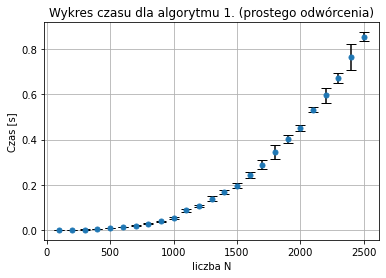

In [19]:
plot_data(data, 25, 100, 100, "Simple Inversion")

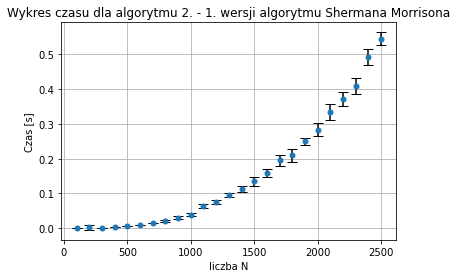

In [20]:
plot_data(data, 25, 100,100, "Sherman Morrison 1")

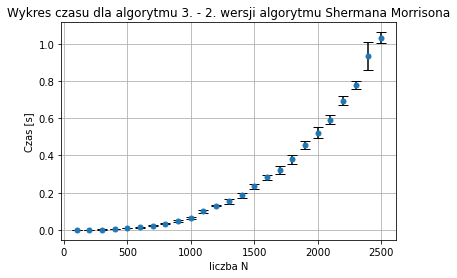

In [21]:
plot_data(data, 25, 100, 100, "Sherman Morrison 2")

### Algorytm dodatkowy i jego pomiar ###

In [22]:
def sherman_morrison_v3(u, v, inv_A):
    numerator = ((inv_A @ u) @ (v.T @ inv_A))
    denominator =  (1.0 + v.T @ inv_A @ u)
    res = inv_A -  numerator / denominator
    return res

### Pomiary algorytmu dodatkowego###

In [23]:
def get_time_v3(u, v, inv_A):
    start =  timer()
    res = sherman_morrison_v3(u, v, inv_A)
    end =  timer()
    return end - start

In [24]:
def perform_multiple_tests_v3(N, repetitions, data):
    A, u, v, inv_A, AuvT = generate_data(N)
    for _ in range(repetitions):
        
        t = get_time_v3(u, v, inv_A)
        s = pd.Series(["Sherman Morrison 3", N, t], index = ["Algorithm", "N", "Time"])
        data = data.append(s,ignore_index=True)
        
    return data

In [25]:
def get_data_v3(points_num, start, step):   
    data = pd.DataFrame(columns = ["Algorithm", "N", "Time"])
    for i in range(points_num):
        data = perform_multiple_tests_v3(start + i*step, 10, data)
    return data

In [26]:
data3= get_data_v3(25, 100, 100)

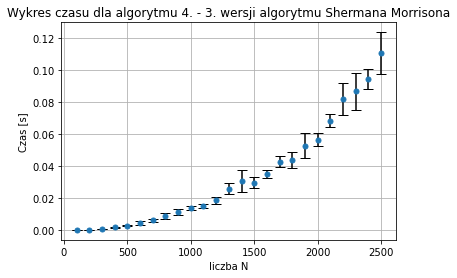

In [27]:
plot_data(data3, 25, 100, 100, "Sherman Morrison 3")

In [56]:
def plot_data(data, points_num, start, step, algorithm, datav3):
    algo_names = {"Simple Inversion": "1. (prostego odwórcenia)", 
                 "Sherman Morrison 1": "2. - 1. wersji algorytmu Shermana Morrisona",
                 "Sherman Morrison 2": "3. - 2. wersji algorytmu Shermana Morrisona",
                 "Sherman Morrison 3": "4. - 3. wersji algorytmu Shermana Morrisona"}
    
    points = [start + i*step for i in range(points_num)]
    means_1 = []
    stds_1 = []
    means_2 = []
    stds_2 = []
    means_3 = []
    stds_3 = []
    means_4 = []
    stds_4 = []
    
    for i in points:
        s = data[data["N"] == i]
        s = s[s["Algorithm"] == "Simple Inversion"]
        means_1.append(s["Time"].mean())
        stds_1.append(s["Time"].std())
    plt.errorbar(points, means_1, yerr=stds_1, fmt='o', ecolor='black', capsize = 3, markersize = 4, color='green', label = 'Proste odwrócenie')
    
    for i in points:
        s = data[data["N"] == i]
        s = s[s["Algorithm"] == "Sherman Morrison 1"]
        means_2.append(s["Time"].mean())
        stds_2.append(s["Time"].std())
    plt.errorbar(points, means_2, yerr=stds_2, fmt='o', ecolor='black', capsize = 3, markersize = 4, color='red', label ='Algorytm Shermana-Morrisona 1')
    for i in points:
        s = data[data["N"] == i]
        s = s[s["Algorithm"] == "Sherman Morrison 2"]
        means_3.append(s["Time"].mean())
        stds_3.append(s["Time"].std())
    plt.errorbar(points, means_3, yerr=stds_3, fmt='o', ecolor='black', capsize = 3, markersize = 4, label ='Algorytm Shermana-Morrisona 2')
    for i in points:
        s = datav3[datav3["N"] == i]
        s = s[s["Algorithm"] == "Sherman Morrison 3"]
        means_4.append(s["Time"].mean())
        stds_4.append(s["Time"].std())
    plt.errorbar(points, means_4, yerr=stds_4, fmt='o', ecolor='black', capsize = 3, markersize = 4, color='purple', label ='Algorytm Shermana-Morrisona 3')

    plt.xlabel("liczba N")
    plt.ylabel("Czas [s]")
    plt.legend()
    plt.title(f"Wykres czasu dla testowanych algorytmów")
    plt.grid()
    plt.show()
        

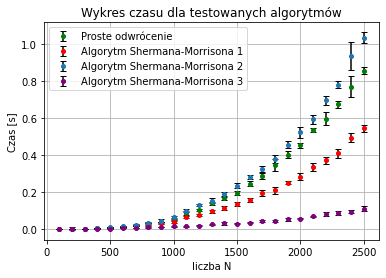

In [57]:
 plot_data(data, 25, 100, 100, "Sherman Morrison 3",data3 )